## Value at Risk

It's used by investors, financial institutions, and risk managers to estimate the amount of potential loss in their investments and to ensure they have enough capital to cover potential losses.

Key Concepts:<br>
Time Horizon: The period over which the potential loss is estimated (e.g., one day, one month).<br>
Confidence Level: The probability that the loss will not exceed the VaR amount (e.g., 95%, 99%).<br>
Loss Amount: The dollar amount or percentage loss that is expected not to be exceeded at the given confidence level.

## Intuition Behind VaR


Think of VaR as a boundary that separates potential losses into two regions:<br>

- The area under the curve representing losses that are probable but manageable.<br>
- The area representing more extreme losses that are less likely but potentially more severe.<br>
For instance, if a portfolio has a one-day VaR of $1 million at a 95% confidence level, this means that there is a 95% chance that the portfolio will not lose more than $1 million in a single day. Conversely, there is a 5% chance that the loss could exceed $1 million in that day.

The concept of Value at Risk (VaR) is one of the most interesting in finance because it analyzes the maximum loss that a portfolio may have (Damodaran 2018). This is another measure of risk that deserves to be separated from portfolio and risk because of the difference that it has with the ratios (Sharpe, Traynor, Information, and Jensen) in the previous chapter. To summarize the VaR, it gives the worst loss on a certain time horizon based on the confidence level assigned to the model.

### Historical VaR(95)<br>

Since the VaR is based on the confidence level, it may have different results based on a 65%, 90%, 95%, or any other confidence interval. The following example is Historical VaR(95), meaning that the confidence interval will be at 95%.

In [33]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime
import pandas_datareader.data as web
# import ffn
from scipy.stats import norm
import plotly.express as px
import yfinance as yf

# VaR of Current and Pervious Portfolio

In [49]:
import numpy as np
import pandas as pd
import yfinance as yf

# Define the weights of each cryptocurrency in the portfolio
# crypto_weights = {
#     "BTC-USD": 0.5 ,
#     "ETH-USD": 0.20 ,
#     "LINK-USD": 0.05 ,
#     "FIL-USD": 0.05 ,
#     "SAND-USD": 0.05 ,
#     "DOT-USD": 0.05 ,
#     "NEAR-USD": 0.05 ,
#     "XRP-USD": 0,
#     "MATIC-USD": 0.05 
# }
crypto_weights = {'BTC-USD': 0.25, 'ETH-USD': 0.25, 'BNB-USD': 0.15, 'DOT-USD': 0.15, 'MANA-USD': 0.1, 'ATOM-USD': 0.1}

# List of assets and their weights
assets = list(crypto_weights.keys())
weights = np.array(list(crypto_weights.values()))

data = yf.download(assets, start='2023-07-01', end='2024-07-01')['Adj Close']

returns = data.pct_change().dropna()
annualized_return = data.iloc[-1]/data.iloc[0]-1

# Calculate annualized return
# annualized_return = returns.mean() * 360

# Calculate annualized volatility (standard deviation)
annualized_volatility = returns.std() * np.sqrt(360)

risk_free_rate = 0.055  # Assuming a risk-free rate of 2% per annum
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility

crypto_metrics = pd.DataFrame({
    'Return': annualized_return,
    'Volatility': annualized_volatility,
    'Sharpe Ratio': sharpe_ratio
})

print("Individual Cryptocurrency Metrics:")
print(crypto_metrics)

# Calculate portfolio return, volatility, and Sharpe ratio
portfolio_return = np.sum(annualized_return * weights)
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 360, weights)))
portfolio_sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

print("\nPortfolio Metrics:")
print(f"Portfolio Return: {portfolio_return:.2%}")
print(f"Portfolio Volatility: {portfolio_volatility:.2%}")
print(f"Portfolio Sharpe Ratio: {portfolio_sharpe_ratio:.2f}")


[**********************83%%**************        ]  5 of 6 completed

[*********************100%%**********************]  6 of 6 completed

Individual Cryptocurrency Metrics:
            Return  Volatility  Sharpe Ratio
Ticker                                      
ATOM-USD -0.297143    0.661686     -0.532190
BNB-USD   1.348129    0.523217      2.471498
BTC-USD   1.048975    0.469656      2.116387
DOT-USD   0.160536    0.696551      0.151512
ETH-USD   0.783721    0.533041      1.367102
MANA-USD -0.189560    0.727352     -0.336233

Portfolio Metrics:
Portfolio Return: 50.36%
Portfolio Volatility: 49.25%
Portfolio Sharpe Ratio: 0.91


In [51]:
crypto_weights = {
    "BTC-USD": 0.5 ,
    "ETH-USD": 0.20 ,
    "LINK-USD": 0.05 ,
    "FIL-USD": 0.05 ,
    "SAND-USD": 0.05 ,
    "DOT-USD": 0.05 ,
    "NEAR-USD": 0.05 ,
    "XRP-USD": 0,
    "MATIC-USD": 0.05 
}
# crypto_weights = {'BTC-USD': 0.25, 'ETH-USD': 0.25, 'BNB-USD': 0.15, 'DOT-USD': 0.15, 'MANA-USD': 0.1, 'ATOM-USD': 0.1}

# List of assets and their weights
assets = list(crypto_weights.keys())
weights = np.array(list(crypto_weights.values()))

# Download historical data from Yahoo Finance
data = yf.download(assets, start='2023-07-01', end='2024-07-01')['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()
annualized_return = data.iloc[-1]/data.iloc[0]-1

# Calculate annualized return
# annualized_return = returns.mean() * 360

# Calculate annualized volatility (standard deviation)
annualized_volatility = returns.std() * np.sqrt(360)

# Calculate Sharpe ratio
risk_free_rate = 0.055  # Assuming a risk-free rate of 2% per annum
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility

# Display return, volatility, and Sharpe ratio for each cryptocurrency
crypto_metrics = pd.DataFrame({
    'Return': annualized_return,
    'Volatility': annualized_volatility,
    'Sharpe Ratio': sharpe_ratio
})

print("Individual Cryptocurrency Metrics:")
print(crypto_metrics)

# Calculate portfolio return, volatility, and Sharpe ratio
portfolio_return = np.sum(annualized_return * weights)
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 360, weights)))
portfolio_sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

print("\nPortfolio Metrics:")
print(f"Portfolio Return: {portfolio_return:.2%}")
print(f"Portfolio Volatility: {portfolio_volatility:.2%}")
print(f"Portfolio Sharpe Ratio: {portfolio_sharpe_ratio:.2f}")


[***********           22%%                      ]  2 of 9 completed

[*********************100%%**********************]  9 of 9 completed

Individual Cryptocurrency Metrics:
             Return  Volatility  Sharpe Ratio
Ticker                                       
BTC-USD    1.048975    0.469656      2.116387
DOT-USD    0.160536    0.696551      0.151512
ETH-USD    0.783721    0.533041      1.367102
FIL-USD    0.090714    0.856645      0.041691
LINK-USD   1.194687    0.791855      1.439262
MATIC-USD -0.172450    0.736169     -0.308965
NEAR-USD   2.579636    1.071025      2.357214
SAND-USD  -0.280137    0.726101     -0.461557
XRP-USD    0.004141    0.917098     -0.055456

Portfolio Metrics:
Portfolio Return: 78.06%
Portfolio Volatility: 51.03%
Portfolio Sharpe Ratio: 1.42


In [36]:
crypto_weights = {'BTC-USD': 0.25, 'ETH-USD': 0.25, 'BNB-USD': 0.15, 'DOT-USD': 0.15, 'MANA-USD': 0.1, 'ATOM-USD': 0.1}
# crypto_weights = {'BTC-USD': 0, 'ETH-USD': 0, 'BNB-USD': 0, 'DOT-USD': 0, 'MANA-USD': 1, 'ATOM-USD': 0}

crypto_weights = {
    "BTC-USD": 0.5 ,
    "ETH-USD": 0.20 ,
    "LINK-USD": 0.05 ,
    "FIL-USD": 0.05 ,
    "SAND-USD": 0.05 ,
    "DOT-USD": 0.05 ,
    "NEAR-USD": 0.05 ,
    "XRP-USD": 0,
    "MATIC-USD": 0.05 
}
assets = list(crypto_weights.keys())
weights = np.array(list(crypto_weights.values()))

data = yf.download(assets, start='2023-07-01', end='2024-07-01')['Adj Close']

returns = data.pct_change().dropna()

weights_array = np.array([crypto_weights[asset] for asset in returns.columns])

portfolio_returns = returns.dot(weights_array)
confidence_level = 0.99
VaR = np.percentile(portfolio_returns, (1 - confidence_level) * 100)

def expected_shortfall(portfolio_returns, VaR):
    return portfolio_returns[portfolio_returns <= VaR].mean()

ES = expected_shortfall(portfolio_returns, VaR)

# Display the Value at Risk and Expected Shortfall
print(f"The Value at Risk (VaR) at {(1 - confidence_level) * 100}% confidence level is: {VaR:.2%}")
print(f"The Expected Shortfall (CVaR) at {(1 - confidence_level) * 100}% confidence level is: {ES:.2%}")


[*********************100%%**********************]  9 of 9 completed

The Value at Risk (VaR) at 1.0000000000000009% confidence level is: -6.91%
The Expected Shortfall (CVaR) at 1.0000000000000009% confidence level is: -8.02%


## Adding cash to our portfolio

In [37]:

# Define the crypto portfolio
crypto = [
    "BTC-USD", "ETH-USD", "LINK-USD", "FIL-USD", 
    "SAND-USD", "DOT-USD", "NEAR-USD", "XRP-USD", "MATIC-USD"
]

# Download historical data for the past year
data = yf.download(crypto, '2023-07-01', '2024-07-01')['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()
returns['Cash'] = 0

# Assume weights for the portfolio with 30% cash allocation
weights = {
    "BTC-USD": 0.35,
    "ETH-USD": 0.14,
    "LINK-USD": 0.035,
    "FIL-USD": 0.035,
    "SAND-USD": 0.035,
    "DOT-USD": 0.035,
    "NEAR-USD": 0.035,
    "XRP-USD": 0,
    "MATIC-USD": 0.035,
    "Cash": 0.3  # Adding Cash to the portfolio
}
# weights = {
#     "BTC-USD": 0,
#     "ETH-USD": 0,
#     "LINK-USD": 0,
#     "FIL-USD": 0,
#     "SAND-USD": 0,
#     "DOT-USD": 0,
#     "NEAR-USD": 1,
#     "XRP-USD": 0,
#     "MATIC-USD": 0,
#     "Cash": 0  # Adding Cash to the portfolio
# }
# Ensure the weights align with the assets in the returns DataFrame
weights_array = np.array([weights[asset] for asset in returns.columns])

# Calculate portfolio returns, excluding cash which has zero return
portfolio_returns = returns.dot(weights_array)
confidence_level = 0.99
VaR = np.percentile(portfolio_returns, (1 - confidence_level) * 100)

# Calculate Expected Shortfall (CVaR)
def expected_shortfall(portfolio_returns, VaR):
    return portfolio_returns[portfolio_returns <= VaR].mean()

ES = expected_shortfall(portfolio_returns, VaR)

# Display the Value at Risk and Expected Shortfall
print(f"The Value at Risk (VaR) at {(1 - confidence_level) * 100}% confidence level is: {VaR:.2%}")
print(f"The Expected Shortfall (CVaR) at {(1 - confidence_level) * 100}% confidence level is: {ES:.2%}")




# portfolio_mean = portfolio_returns.mean()
# portfolio_std = portfolio_returns.std()

# # Calculate VaR at 95% confidence level
# confidence_level = 0.01
# VaR = norm.ppf(confidence_level, portfolio_mean, portfolio_std)

# # Display the Value at Risk
# VaR


[*********************100%%**********************]  9 of 9 completed

The Value at Risk (VaR) at 1.0000000000000009% confidence level is: -4.84%
The Expected Shortfall (CVaR) at 1.0000000000000009% confidence level is: -5.61%


# VaR of BTC

In [38]:
data = yf.download("BTC-USD", '2023-07-1','2024-07-1')['Adj Close']

# Assuming the CSV has a 'Close' column containing daily closing prices

# Calculate daily returns
returns = data.pct_change().dropna()

confidence_level = 0.99
VaR = np.percentile(returns, (1 - confidence_level) * 100)

# Calculate Expected Shortfall (CVaR)
def expected_shortfall(returns, VaR):
    return returns[returns <= VaR].mean()

ES = expected_shortfall(returns, VaR)

# Display the Value at Risk and Expected Shortfall
print(f"The Value at Risk (VaR) at {(1 - confidence_level) * 100}% confidence level is: {VaR:.2%}")
print(f"The Expected Shortfall (CVaR) at {(1 - confidence_level) * 100}% confidence level is: {ES:.2%}")


[*********************100%%**********************]  1 of 1 completed

The Value at Risk (VaR) at 1.0000000000000009% confidence level is: -6.29%
The Expected Shortfall (CVaR) at 1.0000000000000009% confidence level is: -7.41%


# VaR of S&P500

In [39]:
data = yf.download('^GSPC', '2023-07-1','2024-07-1')['Adj Close']

returns = data.pct_change().dropna()

confidence_level = 0.95
VaR = np.percentile(returns, (1 - confidence_level) * 100)

# Calculate Expected Shortfall (CVaR)
def expected_shortfall(returns, VaR):
    return returns[returns <= VaR].mean()

ES = expected_shortfall(returns, VaR)

# Display the Value at Risk and Expected Shortfall
print(f"The Value at Risk (VaR) at {(1 - confidence_level) * 100}% confidence level is: {VaR:.2%}")
print(f"The Expected Shortfall (CVaR) at {(1 - confidence_level) * 100}% confidence level is: {ES:.2%}")


[*********************100%%**********************]  1 of 1 completed

The Value at Risk (VaR) at 5.000000000000004% confidence level is: -1.25%
The Expected Shortfall (CVaR) at 5.000000000000004% confidence level is: -1.44%


# VaR of NASDAQ

In [40]:
data = yf.download('^IXIC', '2023-07-1','2024-07-1')['Adj Close']

returns = data.pct_change().dropna()

confidence_level = 0.95
VaR = np.percentile(returns, (1 - confidence_level) * 100)

# Calculate Expected Shortfall (CVaR)
def expected_shortfall(returns, VaR):
    return returns[returns <= VaR].mean()

ES = expected_shortfall(returns, VaR)

# Display the Value at Risk and Expected Shortfall
print(f"The Value at Risk (VaR) at {(1 - confidence_level) * 100}% confidence level is: {VaR:.2%}")
print(f"The Expected Shortfall (CVaR) at {(1 - confidence_level) * 100}% confidence level is: {ES:.2%}")


[*********************100%%**********************]  1 of 1 completed

The Value at Risk (VaR) at 5.000000000000004% confidence level is: -1.65%
The Expected Shortfall (CVaR) at 5.000000000000004% confidence level is: -1.96%


# Bourse

In [41]:
import finpy_tse as fpy
data = fpy.Get_CWI_History(
    start_date='1402-04-12',
    end_date='1403-04-12',
    ignore_date=False,
    just_adj_close=False,
    show_weekday=False,
    double_date=False)['Adj Close']
returns = data.pct_change().dropna()

confidence_level = 0.99
VaR = np.percentile(returns, (1 - confidence_level) * 100)

# Calculate Expected Shortfall (CVaR)
def expected_shortfall(returns, VaR):
    return returns[returns <= VaR].mean()

ES = expected_shortfall(portfolio_returns, VaR)

# Display the Value at Risk and Expected Shortfall
print(f"The Value at Risk (VaR) at {(1 - confidence_level) * 100}% confidence level is: {VaR:.2%}")
print(f"The Expected Shortfall (CVaR) at {(1 - confidence_level) * 100}% confidence level is: {ES:.2%}")

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

# gold

In [ ]:
data = yf.download("GC=F", '2023-07-1','2024-07-1')['Adj Close']
returns = data.pct_change().dropna()

confidence_level = 0.95
VaR = np.percentile(returns, (1 - confidence_level) * 100)

# Calculate Expected Shortfall (CVaR)
def expected_shortfall(returns, VaR):
    return returns[returns <= VaR].mean()

ES = expected_shortfall(portfolio_returns, VaR)

# Display the Value at Risk and Expected Shortfall
print(f"The Value at Risk (VaR) at {(1 - confidence_level) * 100}% confidence level is: {VaR:.2%}")
print(f"The Expected Shortfall (CVaR) at {(1 - confidence_level) * 100}% confidence level is: {ES:.2%}")

[*********************100%%**********************]  1 of 1 completed

The Value at Risk (VaR) at 5.000000000000004% confidence level is: -1.35%
The Expected Shortfall (CVaR) at 5.000000000000004% confidence level is: -2.71%


# Expected Shortfall


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.stats import norm

# Define the crypto portfolio
crypto = [
    "BTC-USD", "ETH-USD", "LINK-USD", "FIL-USD", 
    "SAND-USD", "DOT-USD", "NEAR-USD", "XRP-USD", "MATIC-USD"
]

# Download historical data for the past year
data = yf.download(crypto, start='2023-07-01', end='2024-07-01')['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()
returns['Cash'] = 0

# Assume weights for the portfolio with 30% cash allocation
weights = {
    "BTC-USD": 0.35,
    "ETH-USD": 0.14,
    "LINK-USD": 0.035,
    "FIL-USD": 0.035,
    "SAND-USD": 0.035,
    "DOT-USD": 0.035,
    "NEAR-USD": 0.035,
    "XRP-USD": 0,
    "MATIC-USD": 0.035,
    "Cash": 0.3  # Adding Cash to the portfolio
}

# Ensure the weights align with the assets in the returns DataFrame
weights_array = np.array([weights[asset] for asset in returns.columns])

# Calculate portfolio returns, excluding cash which has zero return
portfolio_returns = returns.dot(weights_array)

# Calculate the mean and standard deviation of the portfolio returns
portfolio_mean = portfolio_returns.mean()
portfolio_std = portfolio_returns.std()

# Calculate VaR at 99% confidence level
confidence_level = 0.95
VaR = np.percentile(portfolio_returns, (1 - confidence_level) * 100)

# Calculate Expected Shortfall (CVaR)
def expected_shortfall(portfolio_returns, VaR):
    return portfolio_returns[portfolio_returns <= VaR].mean()

ES = expected_shortfall(portfolio_returns, VaR)

# Display the Value at Risk and Expected Shortfall
print(f"The Value at Risk (VaR) at {(1 - confidence_level) * 100}% confidence level is: {VaR:.2%}")
print(f"The Expected Shortfall (CVaR) at {(1 - confidence_level) * 100}% confidence level is: {ES:.2%}")


[***********           22%%                      ]  2 of 9 completed

[*********************100%%**********************]  9 of 9 completed

The Value at Risk (VaR) at 5.000000000000004% confidence level is: -2.70%
The Expected Shortfall (CVaR) at 5.000000000000004% confidence level is: -4.18%


In [ ]:
# Define the tickers with full names
tickers_with_names = {
    'BTC-USD': 'Bitcoin',
    'GC=F': 'Gold Futures',
    'SI=F': 'Silver Futures',
    'CL=F': 'Crude Oil Futures',
    'SPY': 'S&P 500 ETF',
    'AAPL': 'Apple Inc.',
    'MSFT': 'Microsoft Corp.',
    'AMZN': 'Amazon.com Inc.',
    'GOOGL': 'Alphabet Inc.',
    'META': 'Meta Platforms Inc.',
    'TSLA': 'Tesla Inc.',
    'BRK-B': 'Berkshire Hathaway Inc.',
    'V': 'Visa Inc.',
    'JNJ': 'Johnson & Johnson',
    'WMT': 'Walmart Inc.',
    '^DJI': 'Dow Jones Industrial Average Index',
    '^IXIC': 'NASDAQ Composite Index',
    'EURUSD=X': 'EUR/USD Exchange Rate',
    'USDJPY=X': 'USD/JPY Exchange Rate',
    'USDCNY=X': 'USD/CNY Exchange Rate',
    '^TNX': '10-Year Treasury Yield',
}

# Extract tickers from the dictionary
tickers = list(tickers_with_names.keys())

# Fetch historical data
data = yf.download(tickers, start='2023-07-01', end='2024-07-01')['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate the correlation matrix
correlation_matrix = returns.corr()

# Extract the correlation of BTC with other assets
btc_correlation = correlation_matrix.loc['BTC-USD']

# Create a DataFrame to display correlations with names
btc_correlation_df = pd.DataFrame({
    'Ticker': btc_correlation.index,
    'Name': [tickers_with_names[ticker] for ticker in btc_correlation.index],
    'Correlation with BTC': btc_correlation.values
})

# Sort by correlation value
btc_correlation_df = btc_correlation_df.sort_values(by='Correlation with BTC', ascending=False)

btc_correlation_df


[                       0%%                      ]

[*********************100%%**********************]  21 of 21 completed
C:\Users\sbrkz\AppData\Local\Temp\ipykernel_10276\1487858106.py:36: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  returns = data.pct_change().dropna()


,Ticker,Name,Correlation with BTC
3,BTC-USD,Bitcoin,1.000000
19,^IXIC,NASDAQ Composite Index,0.184094
12,SPY,S&P 500 ETF,0.176047
17,WMT,Walmart Inc.,0.143983
18,^DJI,Dow Jones Industrial Average Index,0.143317
13,TSLA,Tesla Inc.,0.108490
10,MSFT,Microsoft Corp.,0.106533
9,META,Meta Platforms Inc.,0.098444
1,AMZN,Amazon.com Inc.,0.096226
0,AAPL,Apple Inc.,0.084685


[*********************100%%**********************]  22 of 22 completed
C:\Users\sbrkz\AppData\Local\Temp\ipykernel_10276\3375738224.py:39: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  returns = data.pct_change().dropna()
c:\Users\sbrkz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sbrkz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sbrkz\AppData\Local\Program

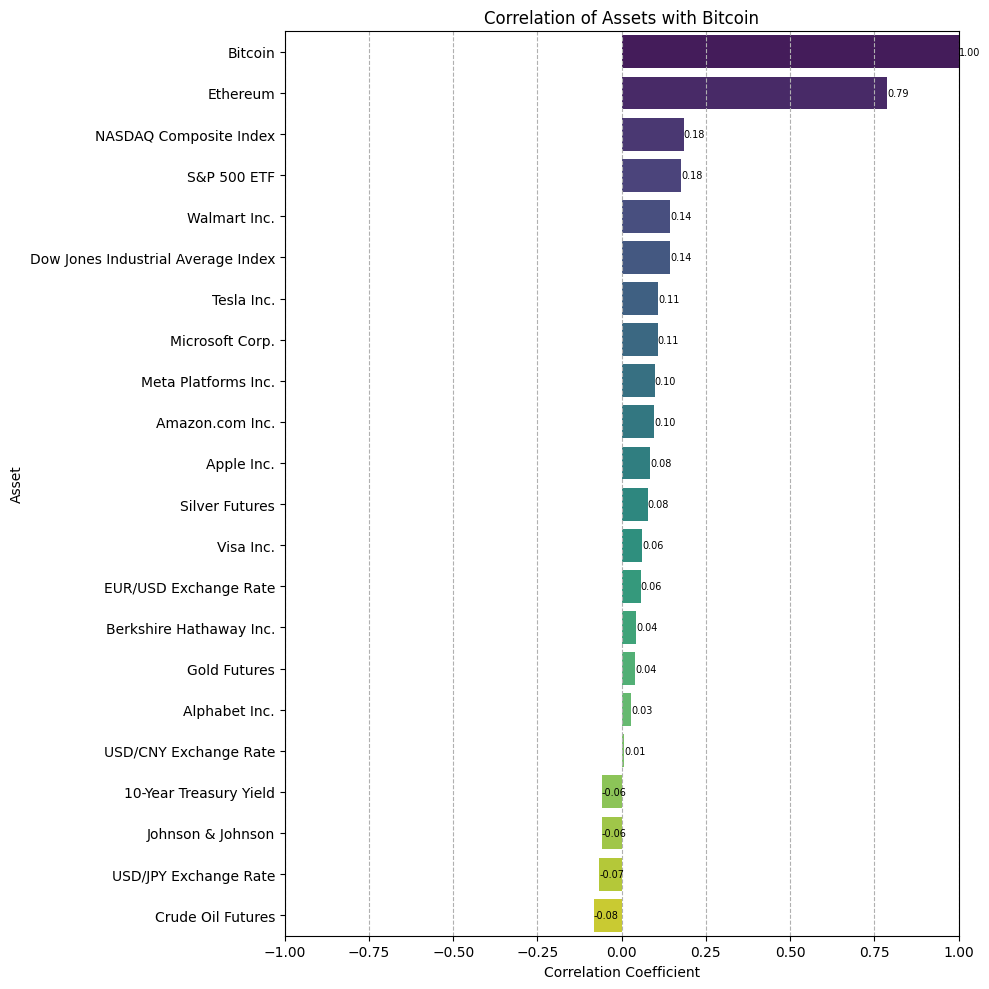

In [ ]:
tickers_with_names = {
    'BTC-USD': 'Bitcoin',
    'ETH-USD': 'Ethereum',

    'GC=F': 'Gold Futures',
    'SI=F': 'Silver Futures',
    'CL=F': 'Crude Oil Futures',
    'SPY': 'S&P 500 ETF',
    'AAPL': 'Apple Inc.',
    'MSFT': 'Microsoft Corp.',
    'AMZN': 'Amazon.com Inc.',
    'GOOGL': 'Alphabet Inc.',
    'META': 'Meta Platforms Inc.',
    'TSLA': 'Tesla Inc.',
    'BRK-B': 'Berkshire Hathaway Inc.',
    'V': 'Visa Inc.',
    'JNJ': 'Johnson & Johnson',
    'WMT': 'Walmart Inc.',
    '^DJI': 'Dow Jones Industrial Average Index',
    '^IXIC': 'NASDAQ Composite Index',
    'EURUSD=X': 'EUR/USD Exchange Rate',
    'USDJPY=X': 'USD/JPY Exchange Rate',
    'USDCNY=X': 'USD/CNY Exchange Rate',
    '^TNX': '10-Year Treasury Yield'
}

# Extract tickers from the dictionary
tickers = list(tickers_with_names.keys())

# Fetch historical data
data = yf.download(tickers, start='2023-07-01', end='2024-07-01')['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate the correlation matrix
correlation_matrix = returns.corr()

# Extract the correlation of BTC with other assets
btc_correlation = correlation_matrix.loc['BTC-USD']

# Create a DataFrame to display correlations with names
btc_correlation_df = pd.DataFrame({
    'Ticker': btc_correlation.index,
    'Name': [tickers_with_names[ticker] for ticker in btc_correlation.index],
    'Correlation with BTC': btc_correlation.values
})

# Sort by correlation value
btc_correlation_df = btc_correlation_df.sort_values(by='Correlation with BTC', ascending=False)

# Plotting horizontal bar chart with annotations
plt.figure(figsize=(10, 10))
barplot = sns.barplot(x='Correlation with BTC', y='Name', data=btc_correlation_df, palette='viridis')

# Add annotations
for index, value in enumerate(btc_correlation_df['Correlation with BTC']):
    barplot.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=7)

plt.title('Correlation of Assets with Bitcoin')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Asset')
plt.xlim(-1, 1)  # Set limit for x-axis to better visualize correlations
plt.grid(axis='x', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()


# Drawdown

[                       0%%                      ]

[*********************100%%**********************]  9 of 9 completed


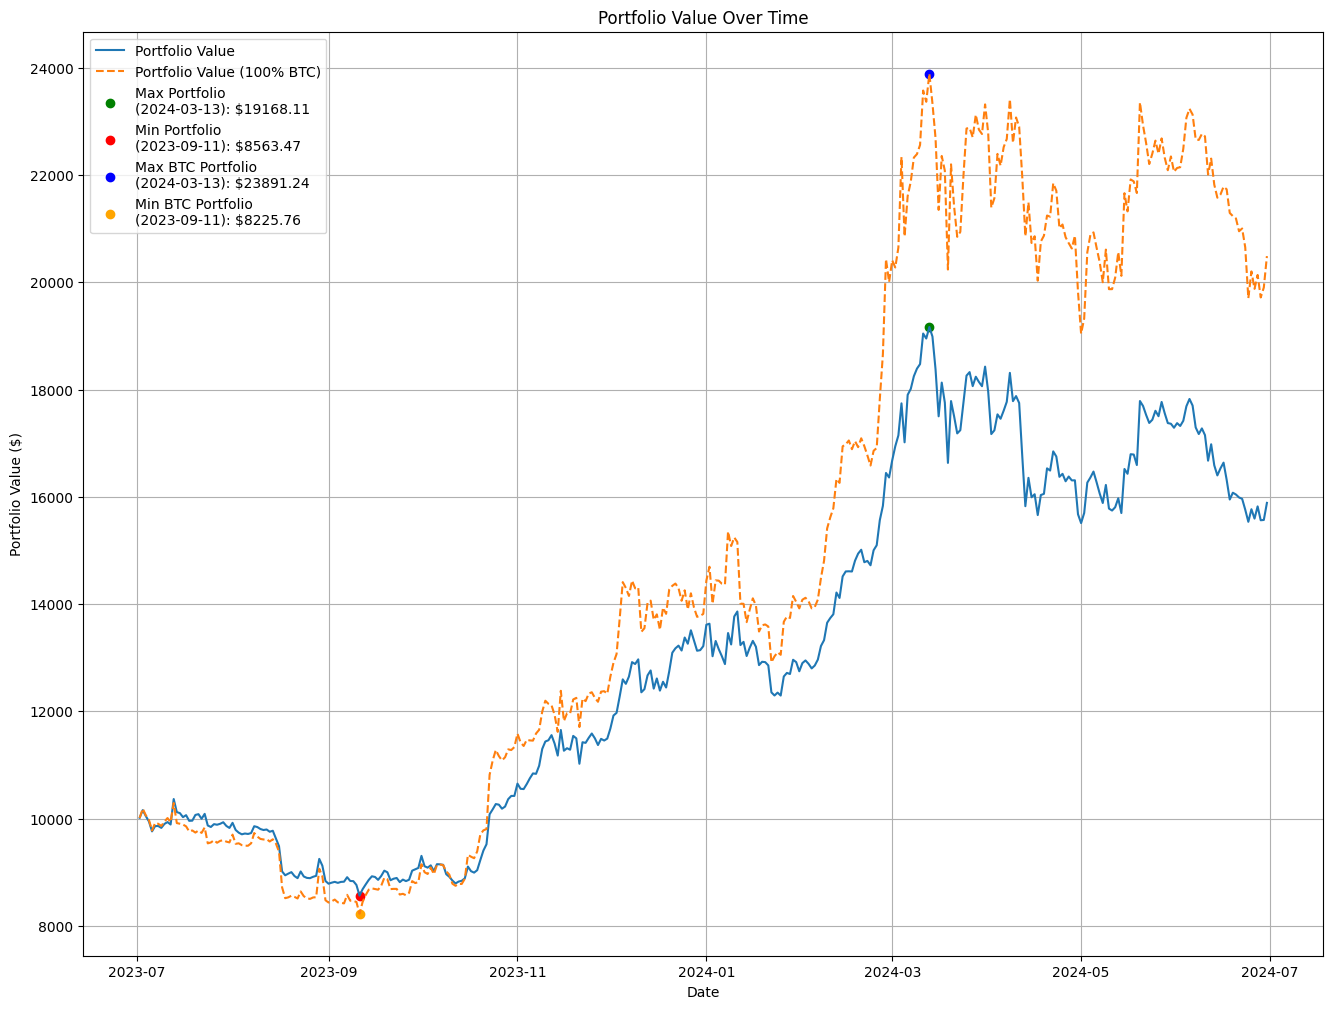

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf  # assuming yfinance is imported correctly

# Define the crypto portfolio
crypto = [
    "BTC-USD", "ETH-USD", "LINK-USD", "FIL-USD", 
    "SAND-USD", "DOT-USD", "NEAR-USD", "XRP-USD", "MATIC-USD"
]

# Download historical data for the past year
data = yf.download(crypto, '2023-07-01', '2024-07-01')['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Assume weights for the portfolio with 30% cash
weights = {
    "BTC-USD": 0.35,
    "ETH-USD": 0.14,
    "LINK-USD": 0.035,
    "FIL-USD": 0.035,
    "SAND-USD": 0.035,
    "DOT-USD": 0.035,
    "NEAR-USD": 0.035,
    "XRP-USD": 0,
    "MATIC-USD": 0.035,
    "Cash": 0.3  # Adding Cash to the portfolio
}

# Initial investment
initial_investment = 10000

# Convert weights dictionary to numpy array in the correct order
weights_array = np.array([weights.get(asset, 0) for asset in returns.columns])

# Calculate portfolio returns
portfolio_returns = returns.dot(weights_array)

# Calculate the cumulative returns of BTC-USD (for comparison)
cumulative_returns_btc = (1 + returns["BTC-USD"]).cumprod()

# Calculate the portfolio value over time for BTC-USD
portfolio_value_btc = initial_investment * cumulative_returns_btc

# Calculate the cumulative returns of the portfolio
cumulative_returns = (1 + portfolio_returns).cumprod()

# Calculate the portfolio value over time
portfolio_value = initial_investment * cumulative_returns

# Find the max and min values of the portfolio
max_value = portfolio_value.max()
max_date = portfolio_value.idxmax()
min_value = portfolio_value.min()
min_date = portfolio_value.idxmin()

# Find the max and min values of the BTC-USD portfolio
max_value_btc = portfolio_value_btc.max()
max_date_btc = portfolio_value_btc.idxmax()
min_value_btc = portfolio_value_btc.min()
min_date_btc = portfolio_value_btc.idxmin()

# Plot the portfolio value over time
plt.figure(figsize=(16, 12))

# Plot portfolio value
plt.plot(portfolio_value, label='Portfolio Value')

# Plot BTC-USD price
plt.plot(portfolio_value_btc, label='Portfolio Value (100% BTC)', linestyle='--')

# Highlight max and min points of the overall portfolio
plt.scatter([max_date], [max_value], color='green', marker='o', label=f'Max Portfolio\n({max_date.strftime("%Y-%m-%d")}): ${max_value:.2f}')
plt.scatter([min_date], [min_value], color='red', marker='o', label=f'Min Portfolio\n({min_date.strftime("%Y-%m-%d")}): ${min_value:.2f}')

# Highlight max and min points of the BTC-USD portfolio
plt.scatter([max_date_btc], [max_value_btc], color='blue', marker='o', label=f'Max BTC Portfolio\n({max_date_btc.strftime("%Y-%m-%d")}): ${max_value_btc:.2f}')
plt.scatter([min_date_btc], [min_value_btc], color='orange', marker='o', label=f'Min BTC Portfolio\n({min_date_btc.strftime("%Y-%m-%d")}): ${min_value_btc:.2f}')

plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
portfolio_value.describe()


count      365.000000
mean     13072.231903
std       3250.412052
min       8563.470504
25%       9889.359113
50%      12882.510455
75%      16290.657954
max      19168.105725
dtype: float64

[*********             18%%                      ]  2 of 11 completed

[*********************100%%**********************]  11 of 11 completed
C:\Users\sbrkz\AppData\Local\Temp\ipykernel_10276\99064165.py:21: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  returns = data.pct_change().dropna()


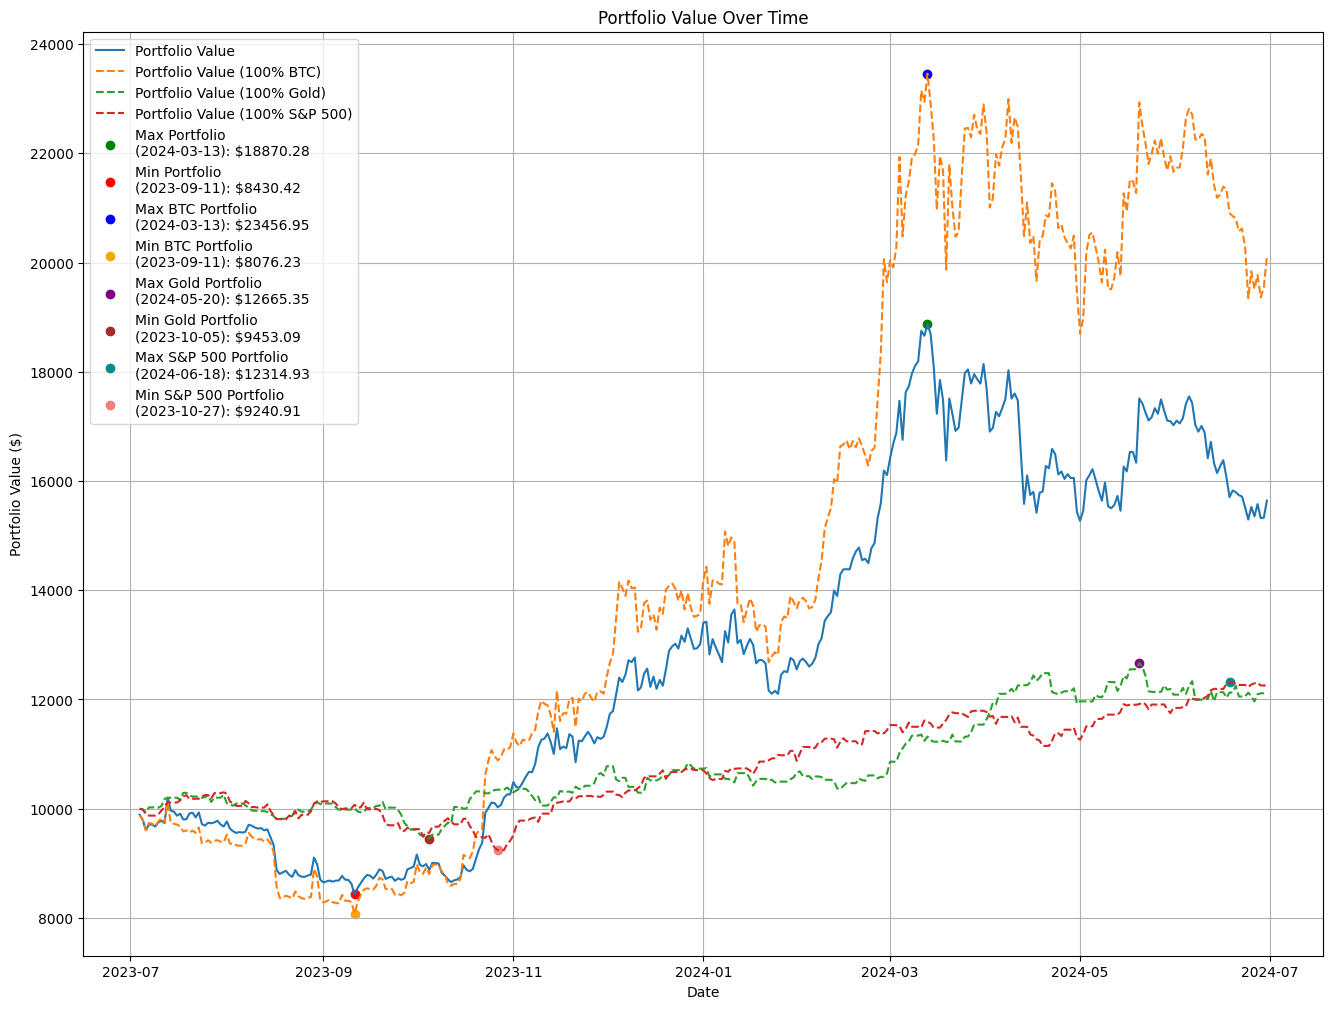

In [ ]:
crypto = [
    "BTC-USD", "ETH-USD", "LINK-USD", "FIL-USD", 
    "SAND-USD", "DOT-USD", "NEAR-USD", "XRP-USD", "MATIC-USD"
]

# Define additional assets
additional_assets = ["GC=F", "^GSPC"]  # Gold futures and S&P 500 index

# Combine all assets
assets = crypto + additional_assets

# Download historical data for the past year
data = yf.download(assets, '2023-07-01', '2024-07-01')['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Assume weights for the portfolio with 30% cash
weights = {
    "BTC-USD": 0.35,
    "ETH-USD": 0.14,
    "LINK-USD": 0.035,
    "FIL-USD": 0.035,
    "SAND-USD": 0.035,
    "DOT-USD": 0.035,
    "NEAR-USD": 0.035,
    "XRP-USD": 0,
    "MATIC-USD": 0.035,
    "Cash": 0.3  # Adding Cash to the portfolio
}

# Initial investment
initial_investment = 10000

# Convert weights dictionary to numpy array in the correct order
weights_array = np.array([weights.get(asset, 0) for asset in returns.columns])

# Calculate portfolio returns
portfolio_returns = returns.dot(weights_array)

# Calculate the cumulative returns of BTC-USD (for comparison)
cumulative_returns_btc = (1 + returns["BTC-USD"]).cumprod()

# Calculate the cumulative returns of Gold (for comparison)
cumulative_returns_gold = (1 + returns["GC=F"]).cumprod()

# Calculate the cumulative returns of S&P 500 (for comparison)
cumulative_returns_sp500 = (1 + returns["^GSPC"]).cumprod()

# Calculate the portfolio value over time for BTC-USD
portfolio_value_btc = initial_investment * cumulative_returns_btc

# Calculate the portfolio value over time for Gold
portfolio_value_gold = initial_investment * cumulative_returns_gold

# Calculate the portfolio value over time for S&P 500
portfolio_value_sp500 = initial_investment * cumulative_returns_sp500

# Calculate the cumulative returns of the portfolio
cumulative_returns = (1 + portfolio_returns).cumprod()

# Calculate the portfolio value over time
portfolio_value = initial_investment * cumulative_returns

# Find the max and min values of the portfolio
max_value = portfolio_value.max()
max_date = portfolio_value.idxmax()
min_value = portfolio_value.min()
min_date = portfolio_value.idxmin()

# Find the max and min values of the BTC-USD portfolio
max_value_btc = portfolio_value_btc.max()
max_date_btc = portfolio_value_btc.idxmax()
min_value_btc = portfolio_value_btc.min()
min_date_btc = portfolio_value_btc.idxmin()

# Find the max and min values of the Gold portfolio
max_value_gold = portfolio_value_gold.max()
max_date_gold = portfolio_value_gold.idxmax()
min_value_gold = portfolio_value_gold.min()
min_date_gold = portfolio_value_gold.idxmin()

# Find the max and min values of the S&P 500 portfolio
max_value_sp500 = portfolio_value_sp500.max()
max_date_sp500 = portfolio_value_sp500.idxmax()
min_value_sp500 = portfolio_value_sp500.min()
min_date_sp500 = portfolio_value_sp500.idxmin()

# Plot the portfolio value over time
plt.figure(figsize=(16, 12))

# Plot portfolio value
plt.plot(portfolio_value, label='Portfolio Value')

# Plot BTC-USD portfolio value
plt.plot(portfolio_value_btc, label='Portfolio Value (100% BTC)', linestyle='--')

# Plot Gold portfolio value
plt.plot(portfolio_value_gold, label='Portfolio Value (100% Gold)', linestyle='--')

# Plot S&P 500 portfolio value
plt.plot(portfolio_value_sp500, label='Portfolio Value (100% S&P 500)', linestyle='--')

# Highlight max and min points of the overall portfolio
plt.scatter([max_date], [max_value], color='green', marker='o', label=f'Max Portfolio\n({max_date.strftime("%Y-%m-%d")}): ${max_value:.2f}')
plt.scatter([min_date], [min_value], color='red', marker='o', label=f'Min Portfolio\n({min_date.strftime("%Y-%m-%d")}): ${min_value:.2f}')

# Highlight max and min points of the BTC-USD portfolio
plt.scatter([max_date_btc], [max_value_btc], color='blue', marker='o', label=f'Max BTC Portfolio\n({max_date_btc.strftime("%Y-%m-%d")}): ${max_value_btc:.2f}')
plt.scatter([min_date_btc], [min_value_btc], color='orange', marker='o', label=f'Min BTC Portfolio\n({min_date_btc.strftime("%Y-%m-%d")}): ${min_value_btc:.2f}')

# Highlight max and min points of the Gold portfolio
plt.scatter([max_date_gold], [max_value_gold], color='purple', marker='o', label=f'Max Gold Portfolio\n({max_date_gold.strftime("%Y-%m-%d")}): ${max_value_gold:.2f}')
plt.scatter([min_date_gold], [min_value_gold], color='brown', marker='o', label=f'Min Gold Portfolio\n({min_date_gold.strftime("%Y-%m-%d")}): ${min_value_gold:.2f}')

# Highlight max and min points of the S&P 500 portfolio
plt.scatter([max_date_sp500], [max_value_sp500], color='darkcyan', marker='o', label=f'Max S&P 500 Portfolio\n({max_date_sp500.strftime("%Y-%m-%d")}): ${max_value_sp500:.2f}')
plt.scatter([min_date_sp500], [min_value_sp500], color='lightcoral', marker='o', label=f'Min S&P 500 Portfolio\n({min_date_sp500.strftime("%Y-%m-%d")}): ${min_value_sp500:.2f}')

plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()


[********************* 44%%                      ]  4 of 9 completed

[*********************100%%**********************]  9 of 9 completed


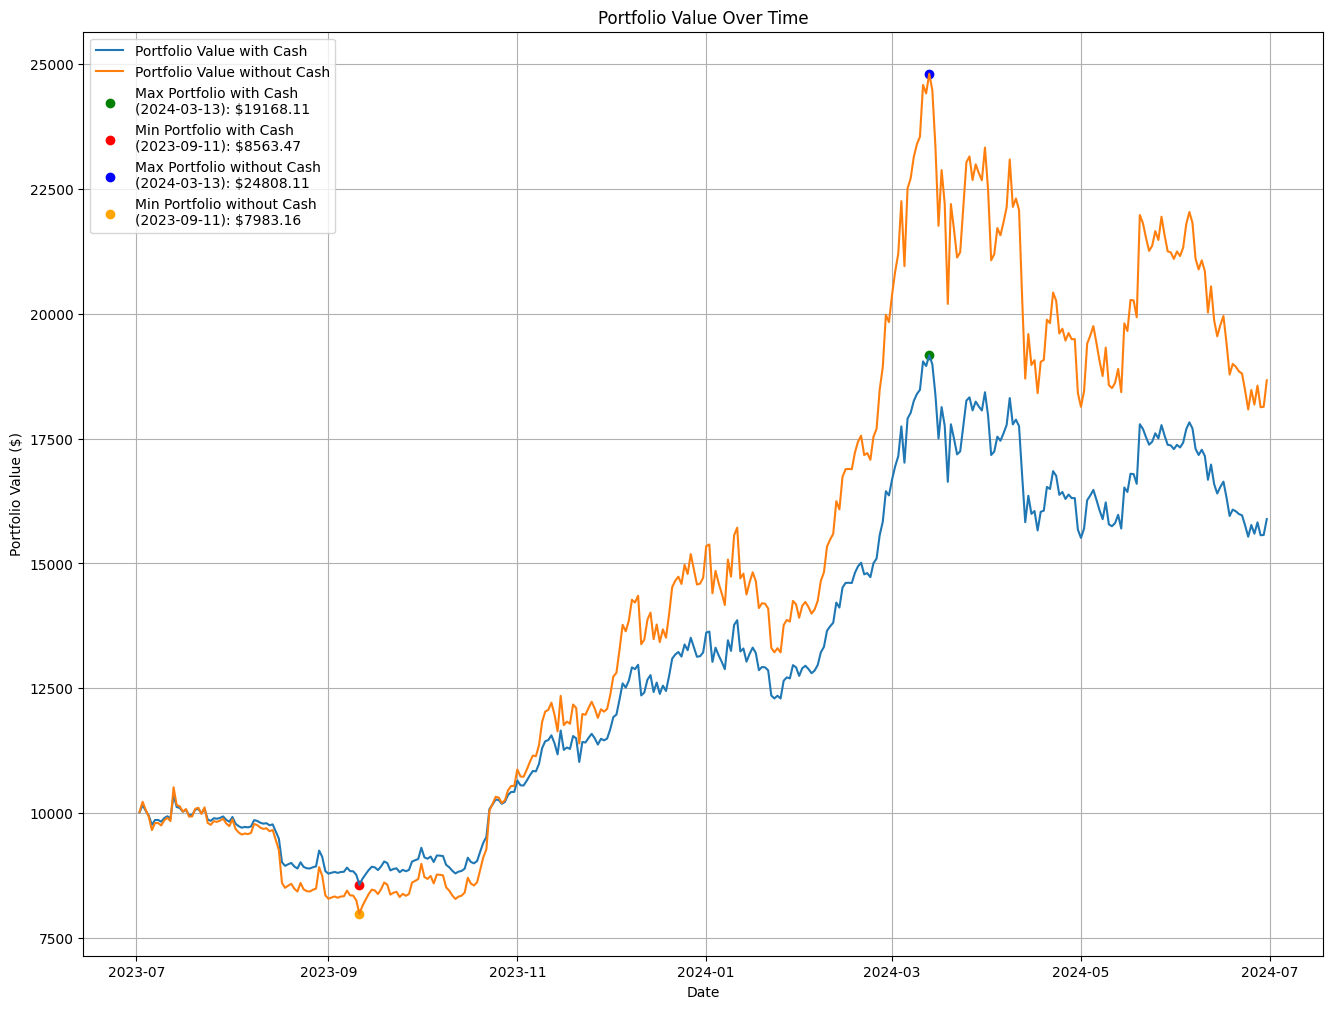

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

# Define the crypto portfolio
crypto = [
    "BTC-USD", "ETH-USD", "LINK-USD", "FIL-USD", 
    "SAND-USD", "DOT-USD", "NEAR-USD", "XRP-USD", "MATIC-USD"
]

# Download historical data for the past year
data = yf.download(crypto, '2023-07-01', '2024-07-01')['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Define portfolio weights
weights1 = {
    "BTC-USD": 0.5,
    "ETH-USD": 0.20,
    "LINK-USD": 0.05,
    "FIL-USD": 0.05,
    "SAND-USD": 0.05,
    "DOT-USD": 0.05,
    "NEAR-USD": 0.05,
    "XRP-USD": 0,
    "MATIC-USD": 0.05
}

weights2 = {
    "BTC-USD": 0.35,
    "ETH-USD": 0.14,
    "LINK-USD": 0.035,
    "FIL-USD": 0.035,
    "SAND-USD": 0.035,
    "DOT-USD": 0.035,
    "NEAR-USD": 0.035,
    "XRP-USD": 0,
    "MATIC-USD": 0.035,
    "Cash": 0.3  # Adding Cash to the portfolio
}

# Convert weights dictionaries to numpy arrays in the correct order
weights_array1 = np.array([weights1.get(asset, 0) for asset in returns.columns])
weights_array2 = np.array([weights2.get(asset, 0) for asset in returns.columns])

# Calculate portfolio returns
portfolio_returns1 = returns.dot(weights_array1)
portfolio_returns2 = returns.dot(weights_array2)

# Calculate the cumulative returns
cumulative_returns1 = (1 + portfolio_returns1).cumprod()
cumulative_returns2 = (1 + portfolio_returns2).cumprod()

# Initial investment
initial_investment = 10000

# Calculate the portfolio value over time
portfolio_value_without_cash = initial_investment * cumulative_returns1
portfolio_value_with_cash = initial_investment * cumulative_returns2

# Find the max and min values of each portfolio
max_value_without_cash = portfolio_value_without_cash.max()
max_date_without_cash = portfolio_value_without_cash.idxmax()
min_value_without_cash = portfolio_value_without_cash.min()
min_date_without_cash = portfolio_value_without_cash.idxmin()

max_value_with_cash = portfolio_value_with_cash.max()
max_date_with_cash = portfolio_value_with_cash.idxmax()
min_value_with_cash = portfolio_value_with_cash.min()
min_date_with_cash = portfolio_value_with_cash.idxmin()

# Plot the portfolio value over time
plt.figure(figsize=(16, 12))

# Plot portfolio values
plt.plot(portfolio_value_with_cash, label='Portfolio Value with Cash')
plt.plot(portfolio_value_without_cash, label='Portfolio Value without Cash')

# Highlight max and min points of each portfolio
plt.scatter([max_date_with_cash], [max_value_with_cash], color='green', marker='o', label=f'Max Portfolio with Cash\n({max_date_with_cash.strftime("%Y-%m-%d")}): ${max_value_with_cash:.2f}')
plt.scatter([min_date_with_cash], [min_value_with_cash], color='red', marker='o', label=f'Min Portfolio with Cash\n({min_date_with_cash.strftime("%Y-%m-%d")}): ${min_value_with_cash:.2f}')

plt.scatter([max_date_without_cash], [max_value_without_cash], color='blue', marker='o', label=f'Max Portfolio without Cash\n({max_date_without_cash.strftime("%Y-%m-%d")}): ${max_value_without_cash:.2f}')
plt.scatter([min_date_without_cash], [min_value_without_cash], color='orange', marker='o', label=f'Min Portfolio without Cash\n({min_date_without_cash.strftime("%Y-%m-%d")}): ${min_value_without_cash:.2f}')

plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
portfolio_value_without_cash.describe()

count      365.000000
mean     14655.294807
std       4990.331254
min       7983.160728
25%       9838.015850
50%      14149.755220
75%      19412.451393
max      24808.113165
dtype: float64

In [ ]:
portfolio_value_with_cash.describe()


count      365.000000
mean     13072.231903
std       3250.412052
min       8563.470504
25%       9889.359113
50%      12882.510455
75%      16290.657954
max      19168.105725
dtype: float64

In [ ]:
portfolio_value_without_cash.describe()

count      365.000000
mean     13072.231903
std       3250.412052
min       8563.470504
25%       9889.359113
50%      12882.510455
75%      16290.657954
max      19168.105725
dtype: float64

# Sharpe Ratio ( consider Cash)

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

# Define the asset weights
weights = {
    "BTC-USD": 0.5 * 0.7,
    "ETH-USD": 0.20 * 0.7,
    "LINK-USD": 0.05 * 0.7,
    "FIL-USD": 0.05 * 0.7,
    "SAND-USD": 0.05 * 0.7,
    "DOT-USD": 0.05 * 0.7,
    "NEAR-USD": 0.05 * 0.7,
    "XRP-USD": 0,
    "MATIC-USD": 0.05 * 0.7,
    "Cash": 0.3  # Remaining 30% allocated to cash
}

# Define the risk-free rate (annual)
risk_free_rate = 0.055

# Download historical data for each asset (excluding cash)
tickers = [ticker for ticker in weights.keys() if ticker != 'Cash']
data = yf.download(tickers, '2023-07-01', '2024-07-01')['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate expected returns and covariance matrix
expected_returns = returns.mean() * 360  # Annualize mean daily return
cov_matrix = returns.cov() * 360  # Annualize covariance matrix

# Convert weights to a numpy array
weight_values = np.array([weights[ticker] for ticker in tickers])

# Calculate portfolio return and portfolio standard deviation
portfolio_return = np.dot(weight_values, expected_returns)
portfolio_std_dev = np.sqrt(np.dot(weight_values.T, np.dot(cov_matrix, weight_values)))

# Calculate the Sharpe Ratio
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev

print("Portfolio Return: ", portfolio_return)
print("Portfolio Standard Deviation: ", portfolio_std_dev)
print("Sharpe Ratio: ", sharpe_ratio)


[                       0%%                      ]

[*********************100%%**********************]  9 of 9 completed

Portfolio Return:  0.4966437684641021
Portfolio Standard Deviation:  0.3572333758132951
Sharpe Ratio:  1.2362892113835504


In [ ]:

weights = {
    "BTC-USD": 0.5 ,
    "ETH-USD": 0.20 ,
    "LINK-USD": 0.05 ,
    "FIL-USD": 0.05 ,
    "SAND-USD": 0.05 ,
    "DOT-USD": 0.05 ,
    "NEAR-USD": 0.05 ,
    "XRP-USD": 0,
    "MATIC-USD": 0.05 ,
    "Cash": 
}

# Define the risk-free rate (annual)
risk_free_rate = 0.055

# Download historical data for each asset (excluding cash)
tickers = [ticker for ticker in weights.keys() if ticker != 'Cash']
data = yf.download(tickers, '2023-07-01', '2024-07-01')['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate expected returns and covariance matrix
expected_returns = returns.mean() * 360  # Annualize mean daily return
cov_matrix = returns.cov() * 360  # Annualize covariance matrix

# Convert weights to a numpy array
weight_values = np.array([weights[ticker] for ticker in tickers])

# Calculate portfolio return and portfolio standard deviation
portfolio_return = np.dot(weight_values, expected_returns)
portfolio_std_dev = np.sqrt(np.dot(weight_values.T, np.dot(cov_matrix, weight_values)))

# Calculate the Sharpe Ratio
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev

print("Portfolio Return: ", portfolio_return)
print("Portfolio Standard Deviation: ", portfolio_std_dev)
print("Sharpe Ratio: ", sharpe_ratio)


[                       0%%                      ]

[*********************100%%**********************]  9 of 9 completed

Portfolio Return:  0.7094910978058603
Portfolio Standard Deviation:  0.5103333940189931
Sharpe Ratio:  1.2824775048553887


[*********************100%%**********************]  9 of 9 completed


                     Metric  With Cash  Without Cash
0                    Return   0.496644      0.709491
1        Standard Deviation   0.357233      0.510333
2              Sharpe Ratio   1.236289      1.282478
3          Max Drawdown (%)  -0.218571     -0.307818
4                 VaR (95%)  -0.026806     -0.038294
5  Expected Shortfall (95%)  -0.042972     -0.061388


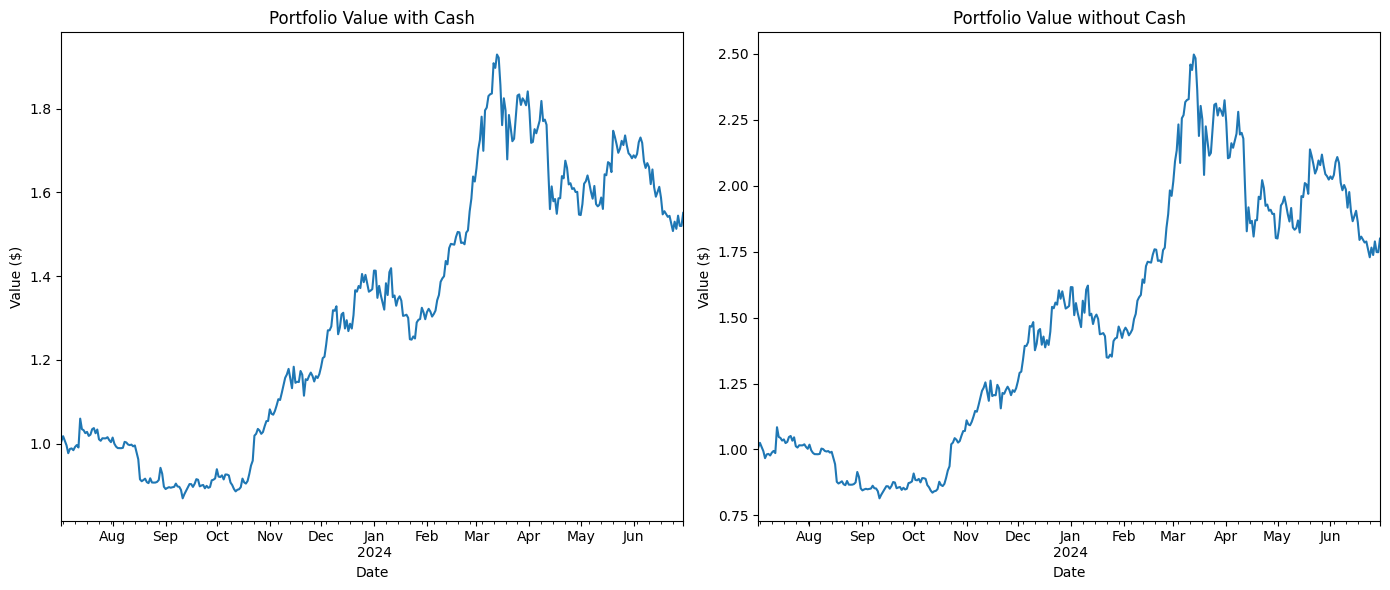

In [ ]:
weights_with_cash = {
    "BTC-USD": 0.5 * 0.7,
    "ETH-USD": 0.20 * 0.7,
    "LINK-USD": 0.05 * 0.7,
    "FIL-USD": 0.05 * 0.7,
    "SAND-USD": 0.05 * 0.7,
    "DOT-USD": 0.05 * 0.7,
    "NEAR-USD": 0.05 * 0.7,
    "XRP-USD": 0,
    "MATIC-USD": 0.05 * 0.7,
    "Cash": 0.3  
}

weights_without_cash = {
    "BTC-USD": 0.5,
    "ETH-USD": 0.20,
    "LINK-USD": 0.05,
    "FIL-USD": 0.05,
    "SAND-USD": 0.05,
    "DOT-USD": 0.05,
    "NEAR-USD": 0.05,
    "XRP-USD": 0,
    "MATIC-USD": 0.05,
    "Cash": 0  
}

tickers = [ticker for ticker in weights_with_cash.keys() if ticker != 'Cash']
data = yf.download(tickers, '2023-07-01', '2024-07-01')['Adj Close']

returns = data.pct_change().dropna()

expected_returns = returns.mean() * 360  
cov_matrix = returns.cov() * 360  

# Function to calculate portfolio metrics
def portfolio_metrics(weights):
    weight_values = np.array([weights[ticker] for ticker in tickers])
    portfolio_return = np.dot(weight_values, expected_returns)
    portfolio_std_dev = np.sqrt(np.dot(weight_values.T, np.dot(cov_matrix, weight_values)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev
    portfolio_returns = returns.dot(weight_values)
    cumulative_returns = (1 + portfolio_returns).cumprod()
    cumulative_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns - cumulative_max) / cumulative_max
    max_drawdown = min(drawdown[1:])  # Convert to percentage
    
    confidence_level = 0.95
    var = np.percentile(portfolio_returns, (1 - confidence_level) * 100)
    es = portfolio_returns[portfolio_returns <= var].mean()

    return {
        'Return': portfolio_return,
        'Standard Deviation': portfolio_std_dev,
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown (%)': max_drawdown,
        'VaR (95%)': var,
        'Expected Shortfall (95%)': es
    }

metrics_with_cash = portfolio_metrics(weights_with_cash)
metrics_without_cash = portfolio_metrics(weights_without_cash)

comparison_data = {
    'Metric': ['Return', 'Standard Deviation', 'Sharpe Ratio', 'Max Drawdown (%)', 'VaR (95%)', 'Expected Shortfall (95%)'],
    'With Cash': [metrics_with_cash['Return'], metrics_with_cash['Standard Deviation'], metrics_with_cash['Sharpe Ratio'], metrics_with_cash['Max Drawdown (%)'], metrics_with_cash['VaR (95%)'], metrics_with_cash['Expected Shortfall (95%)']],
    'Without Cash': [metrics_without_cash['Return'], metrics_without_cash['Standard Deviation'], metrics_without_cash['Sharpe Ratio'], metrics_without_cash['Max Drawdown (%)'], metrics_without_cash['VaR (95%)'], metrics_without_cash['Expected Shortfall (95%)']]
}
comparison_df = pd.DataFrame(comparison_data)

print(comparison_df)

# Plot the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the time series of portfolio values
portfolio_data_with_cash = (1 + returns.dot(np.array([weights_with_cash[ticker] for ticker in tickers]))).cumprod()
portfolio_data_without_cash = (1 + returns.dot(np.array([weights_without_cash[ticker] for ticker in tickers]))).cumprod()

portfolio_data_with_cash.plot(ax=axes[0], title='Portfolio Value with Cash')
axes[0].set_ylabel('Value ($)')
portfolio_data_without_cash.plot(ax=axes[1], title='Portfolio Value without Cash')
axes[1].set_ylabel('Value ($)')

plt.tight_layout()
plt.show()


In [ ]:
comparison_df *100


,Metric,With Cash,Without Cash
0,ReturnReturnReturnReturnReturnReturnReturnRetu...,49.664377,70.949110
1,Standard DeviationStandard DeviationStandard D...,35.723338,51.033339
2,Sharpe RatioSharpe RatioSharpe RatioSharpe Rat...,123.628921,128.247750
3,Max DrawdownMax DrawdownMax DrawdownMax Drawdo...,21.857092,30.781807
4,VaR (95%)VaR (95%)VaR (95%)VaR (95%)VaR (95%)V...,-2.680601,-3.829430
5,Expected Shortfall (95%)Expected Shortfall (95...,-4.297154,-6.138792
